# Stock Price Prediction using Recurrent Neural Networks

## Data Preprocessing

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf

### Importing training set

In [9]:
data_train = pd.read_csv("drive/MyDrive/RNN/Google_Stock_Price_Train.csv")
training_set = data_train.iloc[:, 1: 2].values

### Feature Scaling

In [12]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)
len(training_set_scaled)

1258

### Creating data structure with 60 timesteps and one output

In [14]:
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
  X_train.append(training_set_scaled[i-60: i, 0])
  y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [15]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Building and Training the RNN

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initializing the RNN

In [18]:
regressor = Sequential()

### Adding first LSTM layer and Dropout Regularization

In [19]:
regressor.add(LSTM(units = 50, return_sequences= True, input_shape=(X_train.shape[1], 1))) 
# 3D shape except first dimension which is already accounted for
regressor.add(Dropout(0.2))

### Adding Second LSTM layer and Dropout Regularization

In [20]:
regressor.add(LSTM(units= 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding Third LSTM layer and Dropout Regularization

In [21]:
regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))

### Adding Fourth and Final LSTM layer and Dropout Regularization

In [22]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [24]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [25]:
regressor.compile(optimizer = "adam", loss = "mean_squared_error")

### Fitting the RNN to the training set

In [26]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32 )

Epoch 1/100
38/38 [==============================] - 14s 121ms/step - loss: 0.0463
Epoch 2/100
38/38 [==============================] - 5s 124ms/step - loss: 0.0067
Epoch 3/100
38/38 [==============================] - 5s 119ms/step - loss: 0.0058
Epoch 4/100
38/38 [==============================] - 4s 118ms/step - loss: 0.0058
Epoch 5/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0054
Epoch 6/100
38/38 [==============================] - 4s 118ms/step - loss: 0.0046
Epoch 7/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0045
Epoch 8/100
38/38 [==============================] - 5s 119ms/step - loss: 0.0044
Epoch 9/100
38/38 [==============================] - 5s 119ms/step - loss: 0.0041
Epoch 10/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0040
Epoch 11/100
38/38 [==============================] - 5s 119ms/step - loss: 0.0041
Epoch 12/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0043
Epoch 13/100

## Making Predictions 

### Getting the true values, i.e the real stock prices of 2017

In [40]:
data_test = pd.read_csv("drive/MyDrive/RNN/Google_Stock_Price_Test.csv")
real_stock_price = data_test.iloc[:, 1:2].values

### Getting the predicted stock prices of 2017

In [42]:
data_total = pd.concat((data_train['Open'], data_test['Open']), axis = 0)
inputs = data_total[len(data_total) - len(data_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

## Visualizing Results

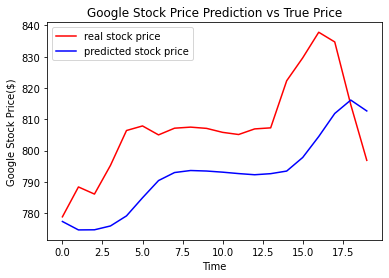

In [43]:
plt.plot(real_stock_price, color = 'red', label = 'real stock price')
plt.plot(predicted_stock_price, color = 'blue', label = 'predicted stock price')
plt.title('Google Stock Price Prediction vs True Price')
plt.xlabel('Time')
plt.ylabel('Google Stock Price($)')
plt.legend()
plt.show()

***